# **Dataset Insertion**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [5]:
fake_df = pd.read_csv('/content/drive/MyDrive/files/Fake.csv')
true_df = pd.read_csv('/content/drive/MyDrive/files/True.csv')

fake_df["label"] = 0
true_df["label"] = 1

In [6]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [7]:
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
# combining the two datasets
df = pd.concat([fake_df, true_df], axis=0)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [9]:
df = df.sample(frac=1).reset_index(drop=True)  # shuffling
df

,title,text,subject,date,label
0,Bosnia making military progress in NATO bid - ...,SARAJEVO (Reuters) - Bosnia meets the military...,worldnews,"November 14, 2017",1
1,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0
2,Twitter TEARS Paul Ryan To BLOODY RIBBONS For...,The Congressional Budget Office s review of th...,News,"March 13, 2017",0
3,Arrest warrant for ex-Catalan leader 'normal' ...,MADRID (Reuters) - If the ousted Catalan leade...,worldnews,"November 2, 2017",1
4,"North Korea likely to pursue talks, South says...",SEOUL (Reuters) - South Korea predicted on Tue...,worldnews,"December 26, 2017",1
...,...,...,...,...,...
44893,October Tease: Wikileaks False Start Leaves Tr...,21st Century Wire says This was one of the mos...,Middle-east,"October 4, 2016",0
44894,House Speaker Ryan: No point in lame duck vote...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,"August 4, 2016",1
44895,BREAKING: OBAMA-APPOINTED JUDGE ORDERS Vote Re...,A federal judge has ordered Michigan election ...,politics,"Dec 5, 2016",0
44896,Callista Gingrich becomes Trump's envoy to pop...,"VATICAN CITY (Reuters) - Callista Gingrich, wi...",politicsNews,"December 22, 2017",1


# **Exploratory Data Analysis**

/tmp/ipython-input-149135237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subject', palette='viridis')


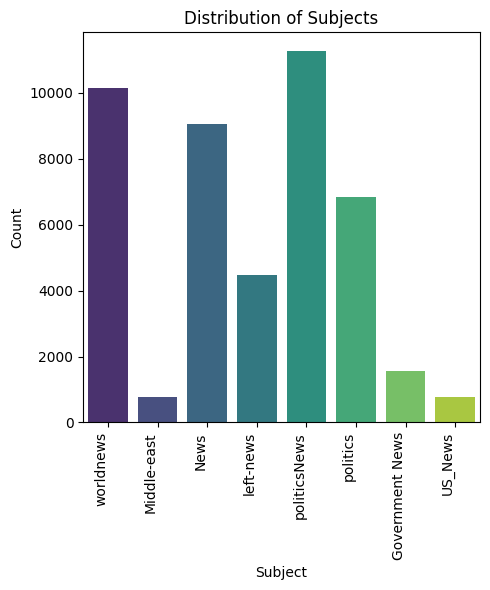

In [10]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x='subject', palette='viridis')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-647321850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


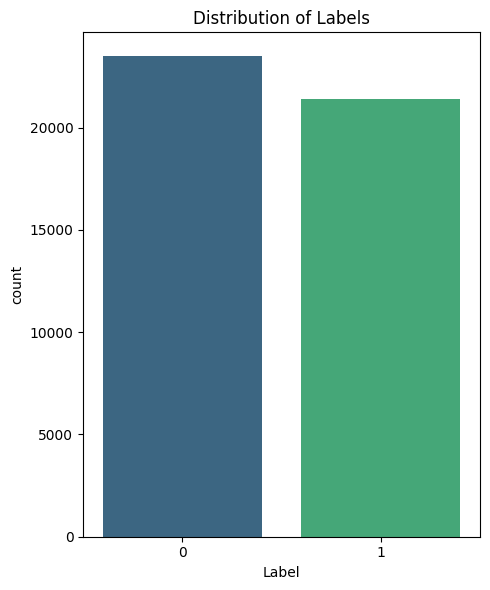

In [11]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('count')
plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# download NLTK data if not already done
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, use_stemming=True):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation & numbers
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)

    # 3. Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # 4. Tokenize
    tokens = text.split()

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Apply stemming OR lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
df["clean_text"] = df["text"].apply(lambda x: preprocess_text(x, use_stemming=False))

In [14]:
df.head()

,title,text,subject,date,label,clean_text
0,Bosnia making military progress in NATO bid - ...,SARAJEVO (Reuters) - Bosnia meets the military...,worldnews,"November 14, 2017",1,sarajevo reuters bosnia meet military conditio...
1,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,st century wire say wire predicted new year lo...
2,Twitter TEARS Paul Ryan To BLOODY RIBBONS For...,The Congressional Budget Office s review of th...,News,"March 13, 2017",0,congressional budget office review republican ...
3,Arrest warrant for ex-Catalan leader 'normal' ...,MADRID (Reuters) - If the ousted Catalan leade...,worldnews,"November 2, 2017",1,madrid reuters ousted catalan leader carles pu...
4,"North Korea likely to pursue talks, South says...",SEOUL (Reuters) - South Korea predicted on Tue...,worldnews,"December 26, 2017",1,seoul reuters south korea predicted tuesday no...


## **Vectorization**

In [15]:
X = df["clean_text"] # 'clean text' will be the feature column
y = df["label"]

#vectorize: convert text into numerical feature
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(X)

## **Train-Test split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model train and test**

## **Logistic Regression**

In [26]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train) #training
y_pred_lr = lr.predict(X_test) #testing

#evaluation matrics
print(f'Accuracy score (Logistic Regression): {accuracy_score(y_test, y_pred_lr)}')
print(f'precision score (Logistic Regression): {precision_score(y_test,y_pred_lr)}')
print(f'recall score (Logistic Regression): {recall_score(y_test, y_pred_lr)}')
print(f'f1 score (Logistic Regression): {f1_score(y_test, y_pred_lr)}')
# roc_auc
print(f'roc_auc score (Logistic Regression): {roc_auc_score(y_test, y_pred_lr)}')

Accuracy score (Logistic Regression): 0.9834075723830735
precision score (Logistic Regression): 0.9816387422538444
recall score (Logistic Regression): 0.9841233317993557
f1 score (Logistic Regression): 0.9828794668505113
roc_auc score (Logistic Regression): 0.9834298143675244


## **SVM**

In [27]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#evaluation matrics
print(f'Accuracy score (SVM): {accuracy_score(y_test, y_pred_svm)}')
print(f'precision score (SVM): {precision_score(y_test, y_pred_svm)}')
print(f'recall score (SVM): {recall_score(y_test, y_pred_svm)}')
print(f'f1 score (SVM): {f1_score(y_test, y_pred_svm)}')
# roc_auc
print(f'roc_auc score (SVM): {roc_auc_score(y_test, y_pred_svm)}')

Accuracy score (SVM): 0.9927616926503341
precision score (SVM): 0.9912784025705761
recall score (SVM): 0.9937873907040957
f1 score (SVM): 0.9925313110421694
roc_auc score (SVM): 0.9927935658742749


## **Decision Tree**

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(f'precision score (Decision Tree): {precision_score(y_test, y_pred_dt)}')
print(f'recall score (Decision Tree): {recall_score(y_test, y_pred_dt)}')
print(f'f1 score (Decision Tree): {f1_score(y_test, y_pred_dt)}')
# roc_auc
print(f'roc_auc score (Decision Tree): {roc_auc_score(y_test, y_pred_dt)}')

Decision Tree Accuracy: 0.99543429844098
precision score (Decision Tree): 0.9979181124219292
recall score (Decision Tree): 0.9926369075011505
f1 score (Decision Tree): 0.9952705040950514
roc_auc score (Decision Tree): 0.995347370453208


## **Random Forest**

In [29]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f'precision score (Random Forest): {precision_score(y_test, y_pred_rf)}')
print(f'recall score (Random Forest): {recall_score(y_test, y_pred_rf)}')
print(f'f1 score (Random Forest): {f1_score(y_test, y_pred_rf)}')
# roc_auc
print(f'roc_auc score (Random Forest): {roc_auc_score(y_test, y_pred_rf)}')


Random Forest Accuracy: 0.9913140311804008
precision score (Random Forest): 0.9910262310170271
recall score (Random Forest): 0.9910262310170271
f1 score (Random Forest): 0.9910262310170271
roc_auc score (Random Forest): 0.9913050878865887


# **Model Evaluation**

In [47]:
# confusion matrix func
def con_matrix(model_name, y_val, y_pred):
  cm = confusion_matrix(y_val, y_pred)

  plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
  })

  # create figure
  fig, ax = plt.subplots(figsize=(5, 4))
  # Define color map
  cmap = sns.color_palette('crest', as_cmap=True)

  sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 12}, linewidths=0.5, linecolor='white')

  # Title for the confusion matrix
  title = f"Confusion Matrix - {model_name}"
  # Axis and Label ticks
  ax.set_title(title)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.xaxis.set_ticklabels(['0', '1'])
  ax.yaxis.set_ticklabels(['0', '1'])

  # Gridline inside the confusion Matrix
  ax.hlines([1], *ax.get_xlim(), color='white', linewidth=4)
  ax.vlines([1], *ax.get_ylim(), color='white', linewidth=4)

  plt.show()


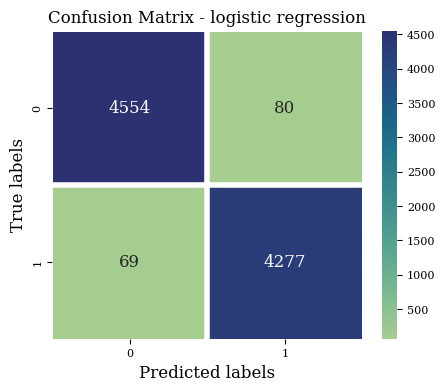

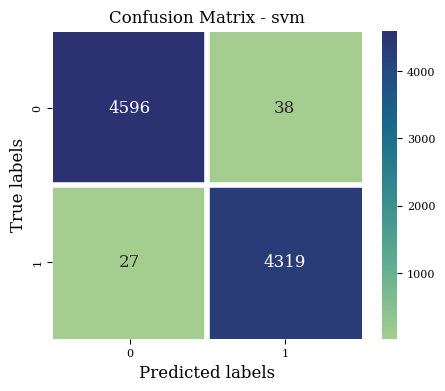

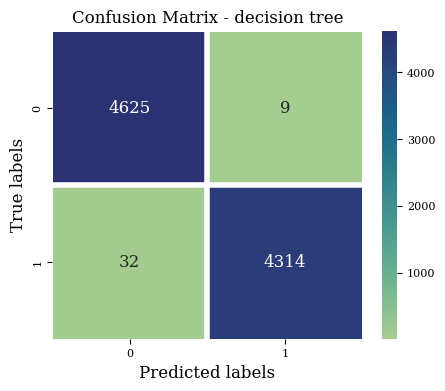

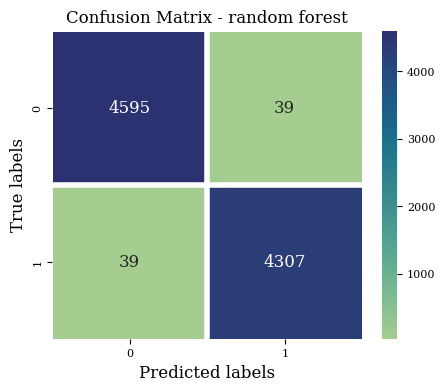

In [48]:
models = {
    'logistic regression': y_pred_lr,
    'svm': y_pred_svm,
    'decision tree': y_pred_dt,
    'random forest': y_pred_rf
}

for model_name, y_pred in models.items():
  con_matrix(model_name, y_test, y_pred)


# **ROC Curve**

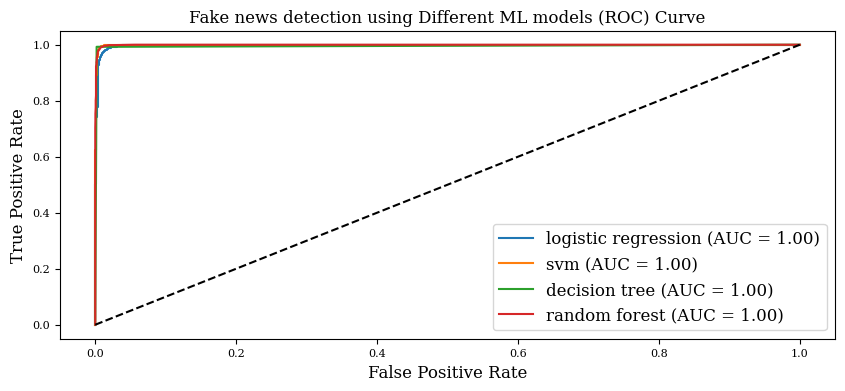

In [53]:
# ROC curve for the models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 4))

models = {
    'logistic regression': lr,
    'svm': svm,
    'decision tree': dt,
    'random forest': rf
}
for model_name, model in models.items():

    if model_name == 'svm':
        y_proba = model.decision_function(X_test)
    else:
        y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    #plotting roc curves
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# graph details
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fake news detection using Different ML models (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
